<a href="https://colab.research.google.com/github/zbrze/MOWNIT-python-/blob/master/MOwNiT_%C4%87w_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Interpolacja 

W poniższych zadaniach wykorzystać funkcje z ćwiczenia poprzedniego. Proszę także użyć tych samych zbiorów punktów. 

#### Zadanie 1: Interpolacja metodą Newtona 
Napisać własną implementację interpolacji wielomianowej  Newtona (metoda ilorazów róznicowych). Zadbac o to, żeby ilorazy wyliczać tylko raz dla danego zbioru wezłow interpolacji. Narysować wykres wielomianu interpolacyjnego dla tych samych danych, co w poprzednim punkcie. Oszacować dokładność (błąd interpolacji). 

#### Zadanie 2: Interpolacj metodą Hermite'a 
Napisać odpowiedni algorytm dla interpolacji Hermite'a. Wizualiacja wyników podobnie jak poprzednio. Oszacować dokładność (błąd interpolacji). 

#### Zadanie 3: Wyjaśnić i zademonstrować efekt Rungego 

#### Zadanie 3: Interpolacja funkcjami sklejanymi 
Wykorzystując bibliotekę SciPy lub NumPy wykonać interpolację danych przy pomocy B-splinów. Oszacować dokładność (błąd interpolacji). 


In [0]:
import numpy as np
def lookupTab(fx, steps):
  val_x = np.array(np.linspace(0, 10, steps))
  array_y = np.zeros([steps])
  for i in range(len(val_x)):
    array_y[i] = fx(val_x[i])
  return array_y

In [0]:
import matplotlib.pyplot as plt
def draw(poly):
  p = np.flip(poly[0].coef, axis=0)
  x_axis = np.linspace(0, 10, num=5000)
  y_axis = np.polyval(p, x_axis)
  plt.plot(x_axis, y_axis)
  plt.show()

In [0]:
import numpy as np
import matplotlib.pyplot as plt

def getDiffTree(fx, steps):
  val_x = np.array(np.linspace(0, 10, steps))
  val_y = lookupTab(fx, steps)
  n = np.shape(val_y)[0]
  diff_tree = np.zeros([n,n])
  for i in range (0,n):
    diff_tree[i][0] = val_y[i]
  for j in range(1,n):
      for i in range(n-j):
          diff_tree[i][j] = (diff_tree[i+1][j-1] - diff_tree[i][j-1]) / (val_x[i+j] - val_x[i])
  return diff_tree



In [0]:
def newtonPoly(diff_tree, steps):
  val_x = np.array(np.linspace(0, 10, steps))
  final_pol = np.polynomial.Polynomial([0.])
  n = diff_tree.shape[0]
  for i in range(n):
    p = np.polynomial.Polynomial([1.]) 
    for j in range(i):
        p_temp = np.polynomial.Polynomial([-val_x[j], 1.])
        p = np.polymul(p, p_temp)
    p *= diff_tree[i]
    final_pol = np.polyadd(final_pol, p)
    return final_pol

sin(x), 4 steps


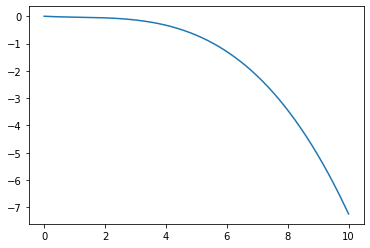

[Polynomial([ 0.        , -0.05717039,  0.03398792, -0.0100718 ], domain=[-1.,  1.], window=[-1.,  1.])]


In [170]:
print("sin(x), 4 steps")
val_x = np.array(np.linspace(0, 10, 4))
p = newtonPoly(getDiffTree(lambda x: np.sin(x),4),4)
draw(p)
print(p)

sqrt(x), 4 steps


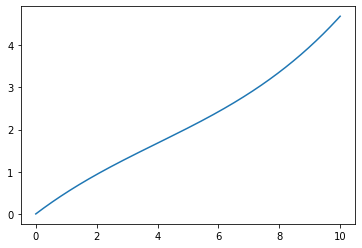

[Polynomial([ 0.        ,  0.54772256, -0.04812727,  0.00402091], domain=[-1.,  1.], window=[-1.,  1.])]


In [171]:
print("sqrt(x), 4 steps")
val_x = np.array(np.linspace(0, 10, 4))
p = newtonPoly(getDiffTree(lambda x: np.sqrt(x),4),4)
draw(p)
print(p)

 x**3+2*x, 4 steps


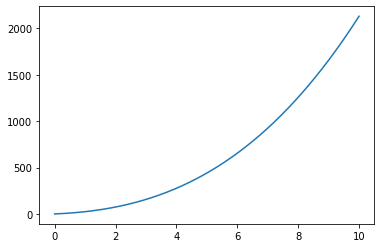

[Polynomial([ 0.        , 13.11111111, 10.        ,  1.        ], domain=[-1.,  1.], window=[-1.,  1.])]


In [172]:
print(" x**3+2*x, 4 steps")
val_x = np.array(np.linspace(0, 10, 4))
p = newtonPoly(getDiffTree(lambda x:  x**3+2*x,4),4)
draw(p)
print(p)

In [0]:
def newtonPoints(diff_tree,steps, point):
    val_x = np.array(np.linspace(0, 10, steps))
    n = diff_tree.shape[0]
    poly = np.zeros(n)
    res = 0
    for i in range(n):
        prod = diff_tree[0][i]
        for j in range(i):
            prod *= (point - val_x[j])
        res += prod
    return res


In [0]:
import statistics

def getPoins(steps):
    val_x=np.linspace(0, 10, steps)
    points=np.zeros([len(val_x)-1])
    for i in range(len(val_x)-1):
        points[i]=(val_x[i+1]-val_x[i])/2+val_x[i]
    return points



def ComparePrecisionNewton(fx, steps):
  points = getPoins(steps)
  poly = newtonPoly(getDiffTree(fx, steps), steps)
  interpolationResults = len(points) * [0]
  for i in range (0, len(points)):
    interpolationResults[i] = newtonPoints(getDiffTree(fx, steps) ,steps, points[i])

  print("results of interpolation:  ", interpolationResults)
  print("accurate results:  ", fx(points))
  diff = (len(points)) *[0]
  for i in range(0, len(fx(points))):
    diff[i] = abs(interpolationResults[i] - fx((points)[i]))
  print("variance:  ",statistics.variance(diff))
  print("median:  ", statistics.median(diff))
  print("standard deviation: ",statistics.stdev(diff))
  draw(poly)
  

3 steps


sin()x 

results of interpolation:   [-0.6511905671361826, -0.9232011225808677]
accurate results:   [0.59847214 0.93799998]
variance:   0.1869896000694322
median:   1.555431905297873
standard deviation:  0.432422941192338


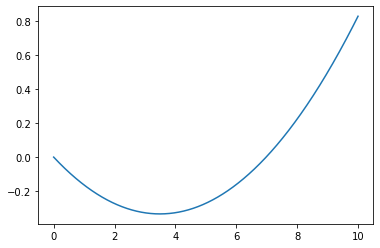


 
 
sqrt()x 

results of interpolation:   [1.2817662756037949, 2.8629051056879846]
accurate results:   [1.58113883 2.73861279]
variance:   0.015326544574625536
median:   0.21183243632127446
standard deviation:  0.12380042235237138


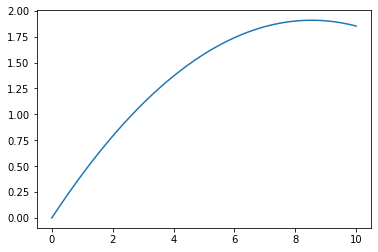


 
 
x**3+2*x 

results of interpolation:   [-26.25, 483.75]
accurate results:   [ 20.625 436.875]
variance:   0.0
median:   46.875
standard deviation:  0.0


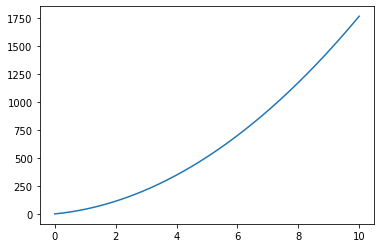

In [175]:
print("3 steps\n\n")
print("sin()x \n")
ComparePrecisionNewton(lambda x: np.sin(x), 3)


print("\n \n \nsqrt()x \n")
ComparePrecisionNewton(lambda x: np.sqrt(x), 3)

print("\n \n \nx**3+2*x \n")
ComparePrecisionNewton(lambda x: (x**3+2*x), 3)




5 steps


sin()x 

results of interpolation:   [1.4054289398836968, -0.5530228042313121, -0.3068165893814873, 1.532509196317703]
accurate results:   [ 0.94898462 -0.57156132 -0.03317922  0.62472395]
variance:   0.1405722662103955
median:   0.36504084668102055
standard deviation:  0.3749296816876406


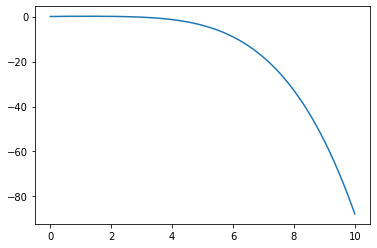


 
 
sqrt()x 

results of interpolation:   [0.9820659963803331, 1.9596017578907892, 2.4853806275312906, 2.983067477944387]
accurate results:   [1.11803399 1.93649167 2.5        2.95803989]
variance:   0.003329522371570519
median:   0.02406883559082973
standard deviation:  0.05770201358332756


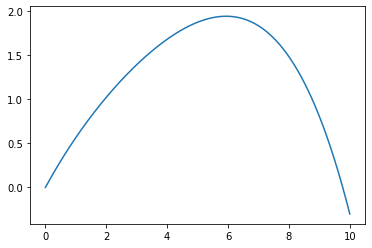


 
 
x**3+2*x 

results of interpolation:   [4.453125, 60.234375, 256.640625, 687.421875]
accurate results:   [  4.453125  60.234375 256.640625 687.421875]
variance:   0.0
median:   0.0
standard deviation:  0.0


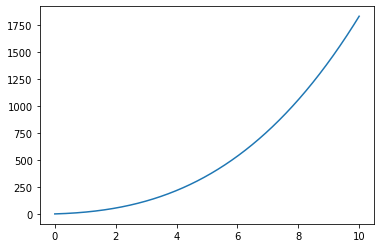

In [176]:

print("\n\n5 steps\n\n")
print("sin()x \n")
ComparePrecisionNewton(lambda x: np.sin(x), 5)


print("\n \n \nsqrt()x \n")
ComparePrecisionNewton(lambda x: np.sqrt(x), 5)

print("\n \n \nx**3+2*x \n")
ComparePrecisionNewton(lambda x: (x**3+2*x),5)





8 steps


sin()x 

results of interpolation:   [0.5304840292893758, 0.8718058290931622, -0.431228730051153, -0.9479081756663869, 0.13179257362958222, 1.0251163355859403, 0.048733475631174306]
accurate results:   [ 0.6550779   0.84078711 -0.41672165 -0.95892427  0.14487449  0.999995
  0.13861589]
variance:   0.0020064950213437576
median:   0.02512133224773927
standard deviation:  0.04479391723597923


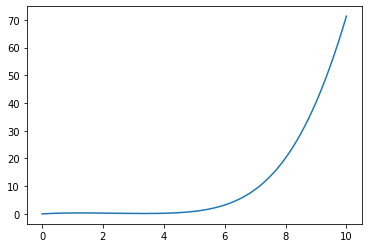


 
 
sqrt()x 

results of interpolation:   [0.7729116135676318, 1.4702934747440497, 1.8879887164138516, 2.237108164174795, 2.5344094708699214, 2.8049714326924122, 3.0401945018007703]
accurate results:   [0.84515425 1.46385011 1.88982237 2.23606798 2.53546276 2.80305955
 3.047247  ]
variance:   0.000686899976108309
median:   0.001911879785471804
standard deviation:  0.02620877669995891


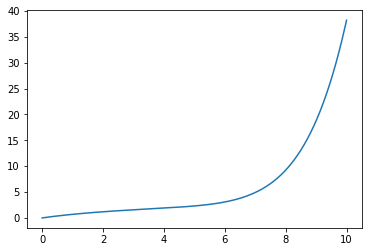


 
 
x**3+2*x 

results of interpolation:   [1.793002915451903, 14.12536443148688, 52.69679300291544, 135.0, 278.5276967930029, 500.7725947521867, 819.2274052478131]
accurate results:   [  1.79300292  14.12536443  52.696793   135.         278.52769679
 500.77259475 819.22740525]
variance:   1.8129408804163616e-27
median:   0.0
standard deviation:  4.2578643477879395e-14


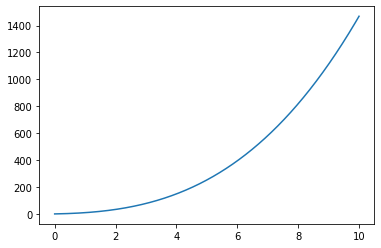

In [177]:

print("\n\n8 steps\n\n")
print("sin()x \n")
ComparePrecisionNewton(lambda x: np.sin(x), 8)


print("\n \n \nsqrt()x \n")
ComparePrecisionNewton(lambda x: np.sqrt(x), 8)

print("\n \n \nx**3+2*x \n")
ComparePrecisionNewton(lambda x: (x**3+2*x),8)

**Zadanie 2: Interpolacj metodą Hermite'a**

---


Napisać odpowiedni algorytm dla interpolacji Hermite'a. Wizualiacja wyników podobnie jak poprzednio. Oszacować dokładność (błąd interpolacji).


In [178]:
def hermitePoly(val_y, steps):
  val_x=np.linspace(0, 10, steps)
  n = len(val_x)
  mul = n*[0]

  for i in range(1, n):
    if val_x[i] == val_x[i - 1]:
      mul[i] = mul[i - 1] + 1
    else:
      mul[i] = 0
  final_pol = np.polynomial.Polynomial([0.])
  for i in range(1, n):
    for j in range(n - 1, i - 1, -1):
      if mul[j] == 0:
        index = j - 1 - mul[j - 1]
        val_y[j] = val_y[j] - val_y[index]
        basis = (val_x[j] - val_x[j - i])
        val_y[j] /= basis
      else:
        val_y[j] /= i
        mul[j] -= 1
  for i in range(n):
    p = np.polynomial.Polynomial([1.])
    for j in range(i):
        p_temp = np.polynomial.Polynomial([-val_x[j], 1.])
        p = np.polymul(p, p_temp)
    p *= val_y[i]
    final_pol = np.polyadd(final_pol, p)
 
  return final_pol

y = lookupTab(lambda x: np.sin(x), 4)
x = np.array(np.linspace(0, 10, 4))

print(hermitePoly(y, 4))
p = np.flip(hermitePoly(y, 4)[0].coef, axis=0)

[Polynomial([ 0.        , -0.39428133,  0.13470596, -0.0100718 ], domain=[-1.,  1.], window=[-1.,  1.])]


In [0]:
def hermitePoint(val_y, steps, point):
  val_x =np.linspace(0, 10, steps)
  n = len(val_x)
  mul = n*[0]

  for i in range(1, n):
    if val_x[i] == val_x[i - 1]:
      mul[i] = mul[i - 1] + 1
    else:
      mul[i] = 0
  final_pol = np.polynomial.Polynomial([0.])
  for i in range(1, n):
    for j in range(n - 1, i - 1, -1):
      if mul[j] == 0:
        index = j - 1 - mul[j - 1]
        val_y[j] = val_y[j] - val_y[index]
        basis = (val_x[j] - val_x[j - i])
        val_y[j] /= basis
      else:
        val_y[j] /= i
        mul[j] -= 1
  res = 0
  for i in range(n):
      part = val_y[i]
      for j in range(i):
          part *= (point - val_x[j])
      res += part
 
  return res

In [0]:
import matplotlib.pyplot as plt
def draw(poly):
  p = np.flip(poly[0].coef, axis=0)
  x_axis = np.linspace(0, 10, num=5000)
  y_axis = np.polyval(p, x_axis)
  plt.plot(x_axis, y_axis)
  plt.show()

In [0]:
import statistics

def getPoins(steps):
    val_x=np.linspace(0, 10, steps)
    points=np.zeros([len(val_x)-1])
    for i in range(len(val_x)-1):
        points[i]=(val_x[i+1]-val_x[i])/2+val_x[i]
    return points

def ComparePrecisionHermi(fx, steps):
  interpolationPoly = hermitePoly(lookupTab(fx,steps), steps)
  points = getPoins(steps)

  interpolationResults = len(points) *[0]
  for i in range (len(points)):
      interpolationResults[i] = hermitePoint(lookupTab(fx,steps), steps, points[i])
  print("results of interpolation:  ", interpolationResults)
  print("accurate results:  ", fx(points))
  diff = np.zeros(len(points))
  for i in range(0, len(fx(points))):
    diff[i] = abs(interpolationResults[i] - fx(points)[i])
  print("variance:  ",statistics.variance(diff))
  print("median:  ", statistics.median(diff))
  print("standard deviation: ",statistics.stdev(diff))
  draw(interpolationPoly)


sin()x 

results of interpolation:   [-0.3295810441798594, 0.13726690750943626, 0.2403126699061796]
accurate results:   [ 0.99540796 -0.95892427  0.88729411]
variance:   0.118972015484931
median:   1.0961911821725747
standard deviation:  0.3449232023000642


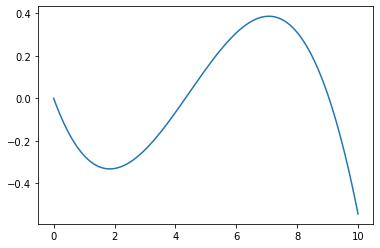

In [182]:
print("sin()x \n")
ComparePrecisionHermi(lambda x: np.sin(x), 4)



 
 
sqrt()x 

results of interpolation:   [1.1024038155042892, 2.2817061963894436, 2.838282029447706]
accurate results:   [1.29099445 2.23606798 2.88675135]
variance:   0.006679565213717438
median:   0.048469316500423076
standard deviation:  0.08172860707070345


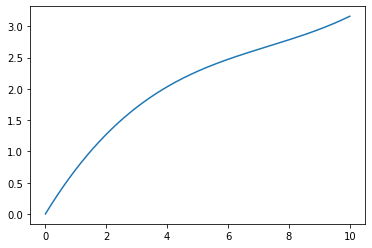

In [183]:
print("\n \n \nsqrt()x \n")
ComparePrecisionHermi(lambda x: np.sqrt(x), 4)


 
 
(x**3+2*x)x 

results of interpolation:   [7.962962962962964, 135.0, 595.3703703703704]
accurate results:   [  7.96296296 135.         595.37037037]
variance:   0.0
median:   0.0
standard deviation:  0.0


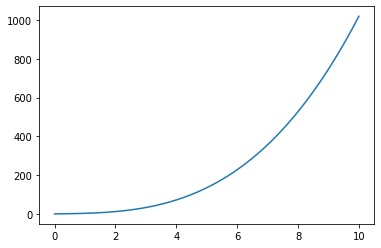

In [184]:
print("\n \n \n(x**3+2*x)x \n")
ComparePrecisionHermi(lambda x: (x**3+2*x), 4)

3 steps


sin()x 

results of interpolation:   [-0.6511905671361826, -0.9232011225808677]
accurate results:   [0.59847214 0.93799998]
variance:   0.1869896000694322
median:   1.555431905297873
standard deviation:  0.432422941192338


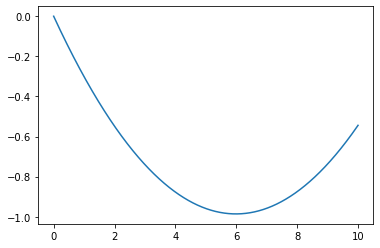


 
 
sqrt()x 

results of interpolation:   [1.2817662756037949, 2.8629051056879846]
accurate results:   [1.58113883 2.73861279]
variance:   0.015326544574625536
median:   0.21183243632127446
standard deviation:  0.12380042235237138


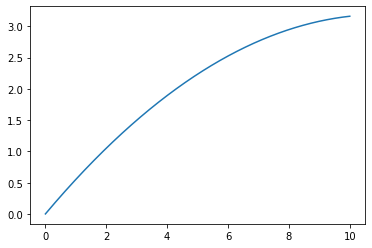


 
 
(x**3+2*x)x 

results of interpolation:   [-26.25, 483.75]
accurate results:   [ 20.625 436.875]
variance:   0.0
median:   46.875
standard deviation:  0.0


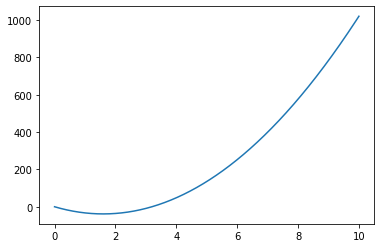

In [185]:
  
print("3 steps\n\n")
print("sin()x \n")
ComparePrecisionHermi(lambda x: np.sin(x), 3)


print("\n \n \nsqrt()x \n")
ComparePrecisionHermi(lambda x: np.sqrt(x), 3)

print("\n \n \n(x**3+2*x)x \n")
ComparePrecisionHermi(lambda x: (x**3+2*x), 3)




5 steps


sin()x 

results of interpolation:   [1.4054289398836968, -0.5530228042313121, -0.3068165893814873, 1.532509196317703]
accurate results:   [ 0.94898462 -0.57156132 -0.03317922  0.62472395]
variance:   0.1405722662103955
median:   0.36504084668102055
standard deviation:  0.3749296816876406


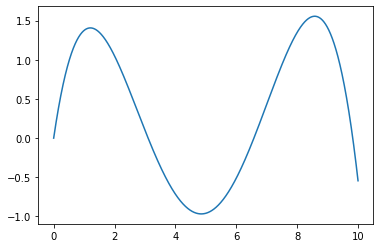


 
 
sqrt()x 

results of interpolation:   [0.9820659963803331, 1.9596017578907892, 2.4853806275312906, 2.983067477944387]
accurate results:   [1.11803399 1.93649167 2.5        2.95803989]
variance:   0.003329522371570519
median:   0.02406883559082973
standard deviation:  0.05770201358332756


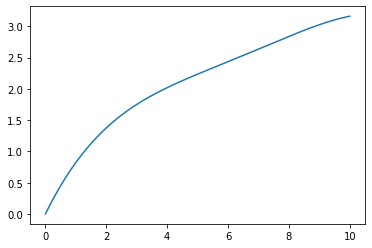


 
 
(x**3+2*x)x 

results of interpolation:   [4.453125, 60.234375, 256.640625, 687.421875]
accurate results:   [  4.453125  60.234375 256.640625 687.421875]
variance:   0.0
median:   0.0
standard deviation:  0.0


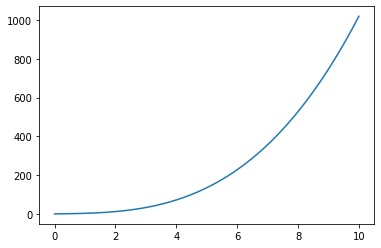

In [186]:
print("\n\n5 steps\n\n")
print("sin()x \n")
ComparePrecisionHermi(lambda x: np.sin(x), 5)


print("\n \n \nsqrt()x \n")
ComparePrecisionHermi(lambda x: np.sqrt(x), 5)

print("\n \n \n(x**3+2*x)x \n")
ComparePrecisionHermi(lambda x: (x**3+2*x), 5)



8 steps


sin()x 

results of interpolation:   [0.5304840292893758, 0.8718058290931622, -0.431228730051153, -0.9479081756663869, 0.13179257362958222, 1.0251163355859403, 0.048733475631174306]
accurate results:   [ 0.6550779   0.84078711 -0.41672165 -0.95892427  0.14487449  0.999995
  0.13861589]
variance:   0.0020064950213437576
median:   0.02512133224773927
standard deviation:  0.04479391723597923


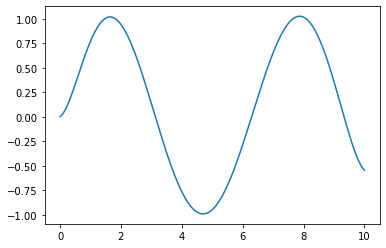


 
 
sqrt()x 

results of interpolation:   [0.7729116135676318, 1.4702934747440497, 1.8879887164138516, 2.237108164174795, 2.5344094708699214, 2.8049714326924122, 3.0401945018007703]
accurate results:   [0.84515425 1.46385011 1.88982237 2.23606798 2.53546276 2.80305955
 3.047247  ]
variance:   0.000686899976108309
median:   0.001911879785471804
standard deviation:  0.02620877669995891


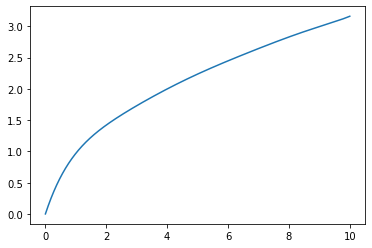


 
 
(x**3+2*x)x 

results of interpolation:   [1.793002915451903, 14.12536443148688, 52.69679300291544, 135.0, 278.5276967930029, 500.7725947521867, 819.2274052478131]
accurate results:   [  1.79300292  14.12536443  52.696793   135.         278.52769679
 500.77259475 819.22740525]
variance:   1.8129408804163616e-27
median:   0.0
standard deviation:  4.2578643477879395e-14


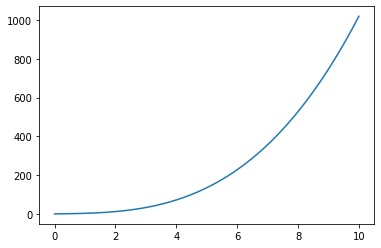

In [187]:

print("\n\n8 steps\n\n")
print("sin()x \n")
ComparePrecisionHermi(lambda x: np.sin(x), 8)


print("\n \n \nsqrt()x \n")
ComparePrecisionHermi(lambda x: np.sqrt(x), 8)

print("\n \n \n(x**3+2*x)x \n")
ComparePrecisionHermi(lambda x: (x**3+2*x), 8)


**Zadanie 3: Wyjaśnić i zademonstrować efekt Rungego**

---



26 węzłów

results of interpolation:   [0.19866933079496432, 0.5646424733950438, 0.8414709848078953, 0.9854497299884606, 0.9738476308781947, 0.8084964038195905, 0.5155013718214637, 0.14112000805986688, -0.25554110202683183, -0.6118578909427191, -0.8715757724135875, -0.9936910036334635, -0.9589242746631361, -0.7727644875559847, -0.46460217941375237, -0.08308940281749662, 0.31154136351338657, 0.6569865987187781, 0.8987080958116294, 0.9985433453746113, 0.9407305566797721, 0.7343970978741182, 0.41211848524178685, 0.0247754254534064, -0.36647912925213105]
accurate results:   [ 0.19866933  0.56464247  0.84147098  0.98544973  0.97384763  0.8084964
  0.51550137  0.14112001 -0.2555411  -0.61185789 -0.87157577 -0.993691
 -0.95892427 -0.77276449 -0.46460218 -0.0830894   0.31154136  0.6569866
  0.8987081   0.99854335  0.94073056  0.7343971   0.41211849  0.02477543
 -0.36647913]
variance:   1.943242640954698e-27
median:   2.3314683517128287e-15
standard deviation:  4.40822259074414e-14


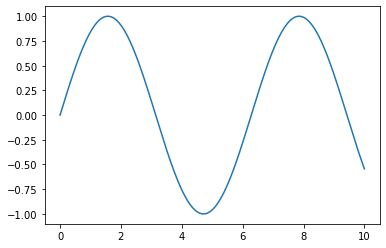

None




40 węzłów

results of interpolation:   [0.12785420453490387, 0.37520264819815147, 0.5980177894161481, 0.7817304646238854, 0.9143282907244427, 0.9871411209519556, 0.995407957751759, 0.9385882591667092, 0.8203972831407138, 0.6485631587121191, 0.4343215684298285, 0.19168108308959922, -0.06349281380312119, -0.314515119139734, -0.5449722890747721, -0.739795468041153, -0.8862457929096068, -0.9747473464117903, -0.9995132956730192, -0.9589242746631391, -0.8556342693500342, -0.6963970820650658, -0.4916247220192434, -0.25470659739861173, -0.0011340248852552517, 0.2525126978800004, 0.4896484248091273, 0.6947676109025661, 0.8544581701309245, 0.9582784487451598, 0.9994399715424849, 0.9752513184987228, 0.88729410809475, 0.7413195803550147, 0.546872541699204, 0.3166672606459868, 0.06575612256905738, -0.18945459772607218, -0.432277485610882]
accurate results:   [ 0.12785421  0.37520265  0.59801779  0.78173046  0.91432829  0.98714112
  0.99540796  0.93858826  0.82039728  0.64856316  0.43432157

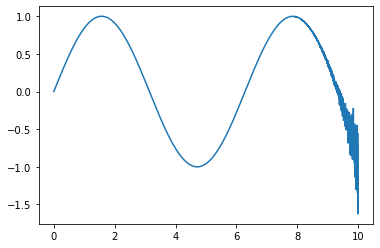

None


In [188]:
#Efekt Rungego polega na obniżeniu się dokładności interpolacji mimo zwiększenia liczby węzłów n.

print("26 węzłów\n")
print(ComparePrecisionHermi(lambda x: np.sin(x), 26))
#

print("\n\n\n")
print("40 węzłów\n")
print(ComparePrecisionHermi(lambda x: np.sin(x), 40))

Można by było przypuszczać że po zwiększeniu liczby węzłów interpolacji, zwiększeniu ulegnie również jej dokładność. Jednak przez instnienie efektu Rugego po przekroczeniu pewnej liczby węzłów zawuażamy odwrotną tendencję - dokładność ulega pogoraszaniu.
W przykładzie powyżej: 
26 węzłów interpolacji - odchylenie standardowe = 4.40822259074414e-14
40 węzłów interpolacji - odchylenie standardowe = 7.907412910347316e-10

Zadanie 4: Interpolacja funkcjami sklejanymi
Wykorzystując bibliotekę SciPy lub NumPy wykonać interpolację danych przy pomocy B-splinów. Oszacować dokładność (błąd interpolacji).


 num = 10


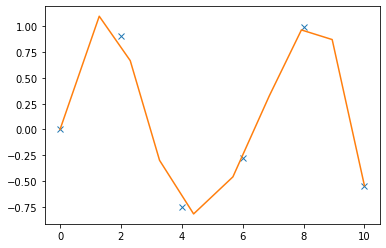


 num = 500


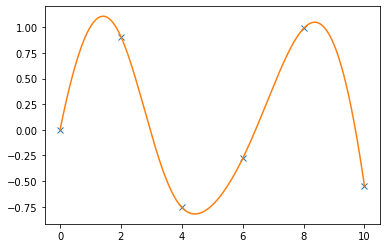

In [189]:
import numpy as np
from scipy import interpolate
import scipy.interpolate as spi
import matplotlib.pyplot as plt

steps = 6
x=np.linspace(0, 10, steps)
y=lookupTab(lambda x: np.sin(x), steps)
print("\n num = 10")
tck,u = interpolate.splprep([x,y],k=3,s=0)
u=np.linspace(0,1,num=10)
out = interpolate.splev(u,tck)
plt.figure()
plt.plot(x, y, 'x', out[0], out[1])
plt.show()


print("\n num = 500")
u=np.linspace(0,1,num=500)
out = interpolate.splev(u,tck)
plt.figure()
plt.plot(x, y, 'x', out[0], out[1])
plt.show()

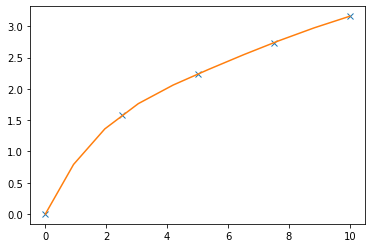

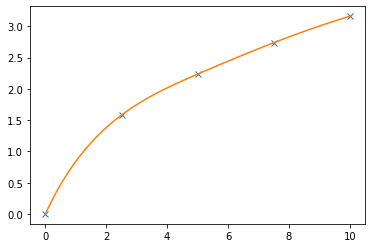

In [190]:

import numpy as np
from scipy import interpolate
import matplotlib.pyplot as plt

steps = 5
x=np.linspace(0, 10, steps)
y=lookupTab(lambda x: np.sqrt(x), steps)

tck,u = interpolate.splprep([x,y],k=3,s=0)
u=np.linspace(0,1,num=10,endpoint=True)
out = interpolate.splev(u,tck)

plt.figure()
plt.plot(x, y, 'x', out[0], out[1])
plt.show()



tck,u = interpolate.splprep([x,y],k=3,s=0)
u=np.linspace(0,1,num=100,endpoint=True)
out = interpolate.splev(u,tck)

plt.figure()
plt.plot(x, y, 'x', out[0], out[1])
plt.show()

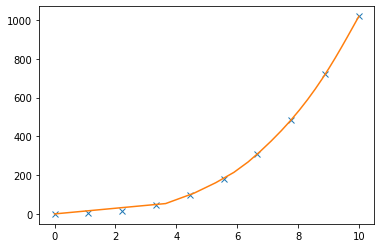

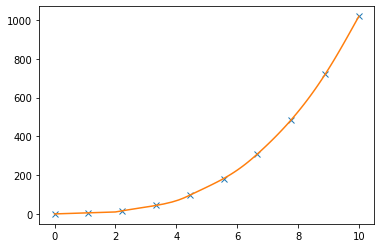

In [191]:
import numpy as np
from scipy import interpolate
import scipy.interpolate as spi
import matplotlib.pyplot as plt

steps =10
x=np.linspace(0, 10, steps)
y=lookupTab(lambda x: (x**3+2*x) , steps)

tck,u = interpolate.splprep([x,y],k=3,s=0)
u=np.linspace(0,1,num=20,endpoint=True)
out = interpolate.splev(u,tck)

plt.figure()
plt.plot(x, y, 'x', out[0], out[1])
plt.show()

tck,u = interpolate.splprep([x,y],k=3,s=0)
u=np.linspace(0,1,num=100,endpoint=True)
out = interpolate.splev(u,tck)

plt.figure()
plt.plot(x, y, 'x', out[0], out[1])
plt.show()
